In [1]:
# These are helpful routines that will assist in building this book.
# You should run this block before anything else. There is no output expected.
from astrodynamicsbook.bookhelpers import *

loadLatexPreamble()

$
\DeclareMathOperator{\Tr}{Tr}
\def\bs{\boldsymbol}
\def\mf{\mathbf}
\def\mb{\mathbb}
\def\mc{\mathcal}
\def\rfr{\mathcal}
\def\grad{{\rm grad}}
\def\Re{{\rm Re}}
\def\Im{{\rm Im}}
\def\und{\underline}
\def\ovl{\overline}
\def\unb{\underbrace}
\def\Log{\mbox{Log}}
\def\bfomega{\bs \omega}
\def\bfalpha{\bs \alpha}
\def\da{\triangleq}
\newcommand{\leftexp}[2]{{\vphantom{#2}}^{#1}\!{#2}}
\newcommand{\leftsub}[2]{{\vphantom{#2}}_{#1}\!{#2}}
\newcommand{\omegarot}[2]{{\leftexp{\mathcal{#1}}{\boldsymbol{\omega}}^{\mathcal{#2}}}}
\newcommand{\alpharot}[2]{{\leftexp{\mathcal{#1}}{\boldsymbol{\alpha}}^{\mathcal{#2}}}}
\newcommand{\framerot}[2]{{\leftexp{\mathcal{#1}}{C}^{\mathcal{#2}}}}
\newcommand{\dframerot}[2]{{\vphantom{\dot{C}}^{\mathcal{#1}}\!{\dot{C}^{\mathcal{#2}}}}}
\newcommand{\bdot}[1]{\dot{\mathbf{#1}}}
\newcommand{\bhat}[1]{\hat{\mathbf{#1}}}
\newcommand{\mbhat}[1]{\hat{\mathbb{#1}}}
\def\iwb{\omegarot{I}{B}}
\def\iab{\alpharot{I}{B}}
\def\icb{\framerot{I}{B}}
\def\dif{\mathop{}\!\mathrm{d}}
\newcommand{\intd}[1]{\dif#1}
\newcommand{\od}[3][]{{ \frac{\dif{^{#1}}#2}{\dif{#3^{#1}}} }}			
\newcommand{\pd}[3][]{{ \frac{\partial{^{#1}}#2}{\partial{#3^{#1}}} }}	 
\newcommand{\md}[6]{{  \frac{\partial{^{#2}}#1}{\partial{#3^{#4}}\partial{#5^{#6}}} }}
\newcommand{\fddt}[2][]{{  \leftexp{\mathcal{#2}}{\frac{\dif{#1}}{\dif{t}}}  }}
\newcommand{\fdddt}[2][]{{  \leftexp{\mathcal{#2}}{\frac{\dif{^{2}#1}}{\dif{t^2}}}  }}
\newcommand{\ddt}[1][]{\fddt[#1]{I}}
$


In [2]:
# This is only here to create the navigation link:
genPrevLink()

# [Previous](<04-Simple Rotations.ipynb>)

# Working with Multiple Reference Frames

We started out the last notebook by setting out to investigate how we can describe the changes in direction of a vector, and then proceeded to expended quite a bit of time and effort to provide ourselves with tools for converting the components of a vector in one frame to components of that vector in a different frame.  The implication here is that there is some utility to operating in multiple reference frames.  But is there?  What, exactly, in Newton's laws suggests that we might be interested in defining and operating in multiple different reference frames?  The answer is: absolutely nothing.

The laws of classical mechanics, as given so far, have absolutely nothing to say about reference frames. In describing his laws, Newton wrote of an "absolute space and time", defined relative to the "fixed stars" (spoiler: there ain't no such things).  In the 19th century, Newton's nomenclature was replaced by Ludwig Lange (a German physicist who made his major contribution in three papers published when he was 22 and 23. What are you doing with your life?).  Lange threw some great shade at Newton: "Newton's absolute space is a phantom that should never be made the basis of an exact science". Instead, Lange introduced the concept of **inertial** reference frames. An inertial frame is literally a frame of reference where Newton's laws holds true. In an inertial frame, the application of a force to a mass at rest will cause the mass to travel in a straight line in the direction of the applied force.  Don't worry for now that we have no idea what 'force' and 'mass' mean.  For now, we're focusing on the straight line part of things.

So, do you need multiple reference frames to do Newtonian dynamics?  Absolutely not!  You only need one inertial frame.  Did we just waste a whole bunch of time on all that DCM nonsense?  Also no.  The introduction of multiple frames is not *necessary* but is frequently incredibly *convenient*.  Non-inertial reference frames can be incredibly handy for simplifying the description of various types of motion, and particularly rotational motion. We're going to posit this now, and proceed to develop a few useful reference frames.  Once we get to actually doing dynamics, it will be up to you to decide whether you agree about the utility of introducing non-inertial frames.  The basic message, however, is that only a single inertial reference frame is needed to do all of classical mechanics. 

# The Polar/Cylindrical Reference Frame

Remember polar coordinates?  We said they were super useful in describing the radial motion of an object in a single plane?  What if, instead of relying on coordinates to handle this description, we define a reference frame to do it?  That frame would be a polar frame:

<p style="text-align:center;"><img src="img/cylindrical_frame.png" alt="Polar/Cylindrical Reference Frame" width="400" id="fig:polarframe"/></p>

We start with an arbitrary frame $\mc I = (O, \bhat{e}_1, \bhat{e}_2, \bhat{e}_3)$ in which the location of a point $P$ with respect to coordinate origin $O$ is defined by Cartesian coordinates $(x,y,z)$ and cylindrical coordinates $(\rho, \theta, z)$.  We now define a new unit direction that *always* points along the direction of the $\rho$ line (the projection of $\mf r_{P/O}$ onto the $\bhat{e}_1 - \bhat{e}_2$ plane). If $P$ is moving with respect to $O$ in the $\mc I$ frame (that is, if the values of $x,y,z,\rho,\theta$ are changing in time) then the direction of $\bhat{e}_r$ will be changing in time as well.   We are now going to build a reference frame with $\bhat{e}_r$ as its first unit vector.  We'll keep our original $\bhat{e}_3$ as the third unit direction.  This means that our second unit direction, which we will call $\bhat{e}_\theta$ must equal $\bhat{e}_3 \times \bhat{e}_r$.  This is our polar (or cylindrical) reference frame: $\mc P = (O, \bhat{e}_r, \bhat{e}_\theta, \bhat{e}_3)$.    If $\mc I$ were an inertial frame, and the angle between $\bhat{e}_r$ and $\bhat{e}_1$ ($\theta$) were constant, then $\mc P$ would also be an inertial frame, as the two frames would be at a constant orientation with respect to one another.  However, the whole point of what we're doing here is that we wish to allow for $\theta$ to vary in time (i.e., $\dot\theta \ne 0$), which means that the two frames will be rotating with respect to one another.  Rotation means acceleration.  Any frame accelerating with respect to an inertial frame is *not* inertial.

<div class="alert alert-block alert-info">
   Notice that we have implicitly introduced one more bit of notation.  Any scalar with an overdot, such as $\dot\theta$ or $\dot x$, etc., should be interpreted as the time derivative of the dotted quantity.  That is:
    $$\dot\theta \equiv \frac{\intd{\theta}}{\intd{t}}$$
    </div>
    
All right, but what have we actually gained here?  To see the utility of the polar frame, we have to think about our coordinates.  $x,y,z$ are Cartesian coordinates in $\mc I$. $\rho,\theta,z$ are cylindrical coordinates in $\mc I$.  But $\rho, z$ are *Cartesian* coordinates in $\mc P$!

<div class="alert alert-block alert-danger">
 There must be a third Cartesian coordinate in $\mc P$ - the one measured along $\bhat{e}_\theta$.  However, the whole point of defining this frame is that we don't need to use this coordinate, and so we shan't bother to name it. It is the coordinate with no name. 
    </div>

The vector $\mf r_{P/O}$ can be represented by 3 Cartesian or cylindrical coordinates in $\mc I$, but only needs two Cartesian coordinates to be defined in $\mc P$:
$$\left[ \mf r_{P/O} \right]_\mc I =  \left[\begin{matrix}x\\y\\z\end{matrix}\right]_\mc I \equiv \left[\begin{matrix}\rho\cos\theta\\\rho\sin\theta\\z\end{matrix}\right]_\mc I   \quad\textrm{and}\quad \left[ \mf r_{P/O} \right]_\mc P =  \left[\begin{matrix}\rho\\0\\z\end{matrix}\right]_\mc P$$

Does this mean that this position vector actually only requires two coordinates to describe it in three dimensional space?  No!  What's happening here is that we are sneakily hiding the extra coordinate ($\theta$) within the frame definition of $\mc P$.  The utility of all this still seems dubious.  We will have to be patient for a bit, and wait until we can actually apply this to some real dynamical systems before we can decide whether all of this is really worth it.   For now, however, let's explore the application of a bit more of our previously defined formalism. 

Since $\mc I$ and $\mc P$ are distinct frames, there is presumably a DCM that relates their orientation.  By inspection of the <a href="#fig:polarframe" >figure</a>, we can see that both frames share the same $\bhat e_3$ unit direction, and that the remaining two unit directions of $\mc P$ are both $\theta$ rotations from their counterparts in the $\mc I$ frame.  Thus, frame $\mc P$ can be described as a counter-clockwise rotation of $\theta$ about the $\bhat{e}_3$ direction - exactly what we previously defined as the $C_3(\theta)$ DCM.  We can therefore write:
$$ \framerot{P}{I} \equiv C_3(\theta) = \begin{bmatrix}  \cos\theta & \sin\theta & 0 \\ -\sin\theta & \cos\theta  & 0\\0 & 0 & 1  \end{bmatrix} $$

Remember the utility of this DCM:
$$[\mf r_{P/O}]_\mc P = \framerot{P}{I} [\mf r_{P/O}]_\mc I \quad \textrm{and}\quad [\mf r_{P/O}]_\mc I = \framerot{I}{P} [\mf r_{P/O}]_\mc P $$
Let's take a look at the second expression first:

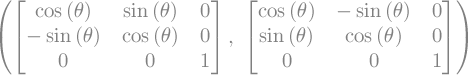

In [3]:
th, rho, x, y, z = symbols("theta,rho,x,y,z")
# rotMat is our method for generating our standard C_1, C_2, and C_3 matrices:
pCi = rotMat(3, th)
iCp = pCi.transpose()  # the inverse rotation
pCi, iCp

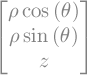

In [4]:
# This should give us the I frame components:
iCp * Matrix([rho, 0, z])

Notice that our frame definition has automatically recreated for us the transformation between polar and Cartesian coordinates.  We did not need to posit the polar coordinates at all - simply to define a frame in which only two coordinates were needed to describe the position of point $P$ and then work through the algebra associated with our newly-developed frame rotation machinery. Now let's take a look at the other direction:

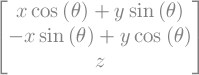

In [5]:
# This should give us the P frame components:
pCi * Matrix([x, y, z])

Remember - the matrix above is supposed to match the matrix representation of this vector's cylindrical frame components.  The first line should be equivalent to $\rho$, which, by inspection, it appears to be.  If $x  = \rho\cos\theta$ and $y = \rho\sin\theta$ then $x\cos\theta + y\sin\theta = \rho\left(\cos^2\theta + \sin^2\theta\right) = \rho$. Great, but what about the second line?  This one is supposed to equal zero, and, by golly, it does!  Using the same substitutions, we have: $-x\sin\theta + y\cos\theta = \rho\left(-\sin\theta\cos\theta + \sin\theta\cos\theta\right) = 0$.  Everything is wonderfully self-consistent, and life is good. There's not actually much more to say about the cylindrical/polar frame (at least for now), so let's make things a bit more interesting, and add another rotation.

# Multiple Rotations
Before we get to defining some fun, new reference frames, lets pause and consider the fact that we have, so far, only dealt with single rotations.  That feels rather...limiting.  What if you want to rotate many times?  What if you have need of multiple, sequential, rotations?  Fear not - it turns out our prep work has...well, prepared us for this. Let's consider three reference frames $\mc A, \mc B$ and $\mc C$.  We now know that if we can identify the axes and angles of rotation between them, we can find the DCMs $\framerot{B}{A}$ and $\framerot{C}{B}$.  Similarly, we know that for a single vector $\mf r$, we can write three different sets of components in these three frames: $[\mf r]_\mc A$, $[\mf r]_\mc B$, and $[\mf r]_\mc C$. Finally, we know that we can convert via these frame representations via the DCMs as:

$$ [\mf r]_\mc B = \framerot{B}{A} [\mf r]_\mc A  \\ [\mf r]_\mc C = \framerot{C}{B} [\mf r]_\mc B $$

What if we substitute the first expression into the second? Then we'd have something like: $$[\mf r]_\mc C = \framerot{C}{B}\framerot{B}{A} [\mf r]_\mc A$$
But according to everything we've figured out so far, there must be a DCM $\framerot{C}{A}$ which operates as $[\mf r]_\mc C = \framerot{C}{A} [\mf r]_\mc A$.  Thus:
$$\framerot{C}{B}\framerot{B}{A} \equiv \framerot{C}{A}$$

DCMs are **composed** by matrix multiplication.  Furthermore, the same exact reasoning would apply whether we used two frames, or three frames, or $N$ frames.  In general:
<div class="alert alert-block alert-info">
   Given $N$ frames $\mc F_1\ldots \mc F_N$:
$$\leftexp{\mc F_1}{C}^{\mc F_2}\leftexp{\mc F_2}{C}^{\mc F_3}\leftexp{\mc F_3}{C}^{\mc F_4}\ldots\leftexp{\mc F_{\mc N-1}}{C}^{\mc F_\mc N} = \leftexp{\mc F_1}{C}^{\mc F_\mc N}$$
    </div>

A **composition** of functions is simply the application of one function to another.  In this case, the composition is given by a matrix multiplication, and since matrices do not, in general, commute, we know that the operation is non-commutative.  The order in which you apply the DCMs is important!  Each subsequent rotation is a *left* matrix multiplication.  The first rotation is represented by the *right*-most DCM. Notice also how our notation is helping us out here.  Whenever adjacent superscripts of a DCM match, they collapse into each other. 

We can also take a look at whether the inverse/transpose properties of these multiple rotation DCMs match what we have previously established for single rotation ones. Again taking the case of $\framerot{C}{B}\framerot{B}{A} = \framerot{C}{A}$, and recalling that for matrices $A$ and $B$, $(AB)^T = B^T A^T$, we have:
$$ \framerot{A}{C} = \left(\framerot{C}{A}\right)^T = \left(\framerot{C}{B}\framerot{B}{A}\right)^T = \framerot{A}{B}\framerot{B}{C}$$
which all works out quite nicely.

Armed with this new knowledge, let's make some new reference frames!

# The Spherical Reference Frame

You knew this was coming, right?  Once we defined a frame in which our polar radius coordinate became a Cartesian coordinate, you just knew that we would have to do the same thing for our spherical radius coordinate.  Well, you were right.  Let's do it.

<p style="text-align:center;"><img src="img/spherical_frame.png" alt="Spherical Reference Frame" width="400" id="fig:spherframe"/></p>

We define a unit direction that *always* points along the direction of $\mathbf{r}_{P/O}$, which we will call $\bhat{r}$.  This is effectively the most compact encoding of this position vector we can get to.  The position of $\mf P$ with respect to $O$ can now be expressed as a single Cartesian coordinate:
$$ \mathbf{r}_{P/O} = r\bhat{r} $$

<div class="alert alert-block alert-danger">
 Again, be careful.  There's no free lunch.  We cannot magically go from describing something via three independent coordinates to describing that same thing with just one coordinate.  There must be two other variables hidden in the definition of the $\bhat{r}$ unit vector, and there are: the azimuth and polar angles $\theta$ and $\phi$.
</div>

We define the spherical reference frame $\mc S \triangleq (O, \bhat{e}_\phi, \bhat{e}_\theta, \bhat{r} )$, where we have used exactly the same $\bhat{e}_\theta$ direction from the polar frame definition. The other new direction $\bhat{e}_\phi$ must therefore equal $\bhat{e}_\theta \times \bhat{r}$.  Why did we do it this way, and why choose this particular ordering of unit vectors for this frame?  Why make $\bhat{r}$ the third direction rather than the first unit direction.  It's the one we really care about, so why list it last?

<div class="alert alert-block alert-warning">
    <b>Exercise</b><br> No, seriously, why <i>did</i> we do it this way?  Take a second to think it through before reading on.
</div>

We did this so that we could define $\mc S$ as a simple rotation of $\phi$ about the second axis of the $\mc P$ frame!  That is: $\framerot{S}{P} = C_2(\phi)$. Using our new understanding of multiple rotations, we can therefore relate $\mc S$ back to our starting point, the $\mc I$ frame:
$$\framerot{S}{I} = \framerot{S}{P}\framerot{P}{I} = C_2(\phi)C_3(\theta)$$

Remember - the first rotation is represented by the right-most DCM and each subsequent rotation is a left multiplication by its DCM.  Let's take a look at the resulting matrices:

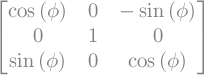

In [6]:
r, phi = symbols("r,phi")
sCp = rotMat(2, phi)  # phi rotation about second axis
sCp

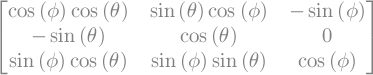

In [7]:
sCi = sCp * pCi
iCs = sCi.transpose()  # Calculating now for future use
sCi

Notice how this matrix now has many more non-zero elements, meaning that it is closer (than our $C_i$ forms) to describing a completely arbitrary rotation (such as we saw when exploring the Rodrigues equation).  However, it still retains a single zero element, meaning that two successive rotations about different axes are not quite enough to describe any arbitrary simple rotation.  This is hinting at something that we'll return to.

For now, let's see if we can repeat our trick from the polar frame and recreate the system of equations mapping spherical and Cartesian coordinates.  Specifically, we will look at the expression:
$$[\mf r_{P/O}]_\mc I = \framerot{I}{S} [\mf r_{P/O}]_\mc S$$

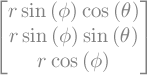

In [8]:
# This should give us the I frame components:
iCs * Matrix([0, 0, r])

Excellent! These are exactly the equations we laid out when first introducing [spherical coordinates](<01-Introduction.ipynb#Spherical-Coordinates>).  Your turn now:

In [9]:
# Use the spherical frame definition to find the inverse set of equations

There are many other useful reference frames we can define, but these two (along with arbitrary frames attached to rotating bodies that are defined for use with corresponding Cartesian coordinates) actually have among the highest utility for a fairly broad set of problems.  We'll touch upon other frames as we need them, but for now, let's take a moment to consider the procedure we used for defining the polar and spherical reference frames.  We employed simple rotations about unit vectors defining our various reference frames in order to generate new reference frames with specific properties (i.e., having unit vectors that track particle motion in a plane and in 3D space).  This might lead one to wonder whether there is a way to generalize this process such that we can describe any simple rotation (and therefore any frame orientation) as a series of rotations about frame-defining unit vectors?

<div class="alert alert-block alert-danger">
Spoilers: there is.
</div>

# Euler Angles

We start with an assertion: any simple rotation (and thus any arbitrary DCM) can be decomposed into 3 successive simple rotations about non-repeating unit directions.  The unit directions may belong to the current reference frame (i.e., the frame to which all prior rotations have been applied - a body-fixed frame), in which case these are known as **body** or **intrinsic** rotations) or to the original (possibly inertial) frame, in which case these are **space** or **extrinsic** rotations.  Because the three DCMs involved in this decomposition are each parametrized by a single angle, what we are saying is that three angles (associated with a sequence of rotations about three specific unit directions, at least two of which are distinct from one another) can encode *any* simple rotation between two reference frames.

We are going to provide a proof of this assertion by construction, meaning that we are going to show multiple examples of this working.  In some sense, we've already proved much of this when we previously explored encodings of specific reference frames using multiple such DCMs.  The only thing new about our current assertion is that 3 is the magic number.  However, here too, we have already provided ourselves with prior evidence that this must be true, since we know that the basic encoding of a simple rotation requires three scalars - one to define an angle and two to define an axis (unit vector). 

The caveat about non-repeating axes is explained as follows:  Suppose that we take two rotations about the same axis using two different angles, $\theta_1$ and $\theta_2$:

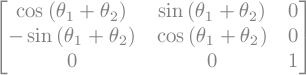

In [10]:
th1, th2 = symbols("theta_1,theta_2", real=True)
simplify(
    rotMat(3, th2) * rotMat(3, th1)
)  # remember that DCMs are composed by multiplication

The end result is a single rotation about that axis using a total angle $\theta_1 +\theta_2$.  Thus, by repeating an axis (and still limiting ourselves to just three total rotations), we lose our ability to describe a general rotation - one where we can describe the rotation by any angle about any axis.

Let's think a bit more about what it means for a DCM to be able to encode any rotation. Recall that we have already figured out the general form of a DCM as a function of the axis and angle of rotation:
$$\framerot{A}{B} =  \left[\begin{matrix}n_{1}^{2} \left(1 - \cos{\left(\theta \right)}\right) + \cos{\left(\theta \right)} & - n_{1} n_{2} \left(\cos{\left(\theta \right)} - 1\right) - n_{3} \sin{\left(\theta \right)} & - n_{1} n_{3} \left(\cos{\left(\theta \right)} - 1\right) + n_{2} \sin{\left(\theta \right)}\\- n_{1} n_{2} \left(\cos{\left(\theta \right)} - 1\right) + n_{3} \sin{\left(\theta \right)} & n_{2}^{2} \left(1 - \cos{\left(\theta \right)}\right) + \cos{\left(\theta \right)} & - n_{1} \sin{\left(\theta \right)} - n_{2} n_{3} \left(\cos{\left(\theta \right)} - 1\right)\\- n_{1} n_{3} \left(\cos{\left(\theta \right)} - 1\right) - n_{2} \sin{\left(\theta \right)} & n_{1} \sin{\left(\theta \right)} - n_{2} n_{3} \left(\cos{\left(\theta \right)} - 1\right) & n_{3}^{2} \left(1 - \cos{\left(\theta \right)}\right) + \cos{\left(\theta \right)}\end{matrix}\right]$$

for angle $\theta$ and axis $[ \bhat{n} ]_\mc A = \begin{bmatrix} n_1 & n_2 & n_3 \end{bmatrix}_\mc A^T$.  From the form of this, a general description of a DCM *must* have non-zero entries everywhere.  While we can find special cases where multiple entries equal zero (or some equal zero and some are 1), the general case requires us to accommodate all nine entries being non-zero.  There is no combination of the basis vector DCMs where the product of just two of them will generate a matrix with no zero entries.

<div class="alert alert-block alert-warning">
<b>Exercise</b><br> Demonstrate that no two basis-vector DCMs will multiply to a DCM with no zero entries.
</div>

On the other hand, *any* three of the DCMs (so long as the same one is not repeated twice in a row) will *always* generate a completely filled matrix with no zero entries. Let's take a look.

## Body Rotations

Let's start with an Euler angle set using all three axes.

<div class="alert alert-block alert-danger">
    Some authors will make a distinction between Euler angle sets using two or three distinct axes, calling the former 'proper' Euler angles and the latter 'Tait-Bryan angles' or 'Cardan angles'. Such distinctions are not hugely important when just stating the sequence of rotations uniquely identifies what you are doing.  As such, we'll usually just be calling all of these Euler angles. We should also note that some specific sets (e.g., 'yaw, pitch, and roll') also have special names for the rotation angles. When we need to distinguish between the different classes of Euler angles, we will use the nomenclature <strong>Body-2/Space-2</strong> for Euler angle sets using two distinct axes and <strong>Body-3/Space-3</strong> for Euler angle sets using three distinct axes.
</div>

We consider a rotation of $\theta_1$ about the first unit direction of our original frame (which we'll call $\mc A$), followed by a rotation of $\theta_2$ about the second unit direction of the frame generated by the first rotation, followed by a rotation of $\theta_3$ about the third unit direction of the latest reference frame, which aligns it with our final frame, which we'll call $\mc B$. Thus:
$$\framerot{B}{A} = C_3(\theta_3)C_2(\theta_2)C_1(\theta_1)$$
recalling, as always, that successive rotations are represented by *left* matrix multiplications and where we are using the notation we established for [basis vector DCMs](<04-Simple Rotations.ipynb#Basis-Vector-DCMs>). Crunching this out:

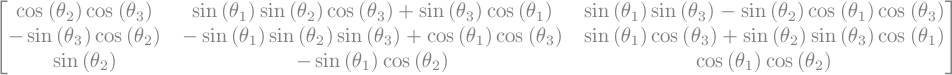

In [11]:
th1, th2, th3 = symbols("theta_1,theta_2,theta_3", real=True)
rotMat(3, th3) * rotMat(2, th2) * rotMat(1, th1)

We can take a look at a set with a repeated axis, say a 1-2-1 rotation, using the same angles:

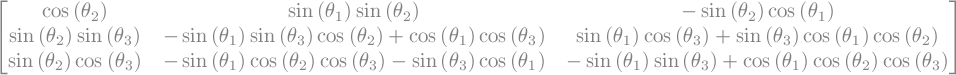

In [12]:
rotMat(1, th3) * rotMat(2, th2) * rotMat(1, th1)

A pattern begins to emerge.  All such sets (there are 12 - 6 proper and 6 Tait-Bryan) will produce a completely filled DCM with no zero elements.  One row (corresponding to the axis of the third rotation) and one column (corresponding to the axis of the first rotation) will be algebraically simpler than the rest of the terms, with the intersecting element of the row and column consisting of a single sine or cosine (positive or negative) in the intermediate rotation angle. 

<div class="alert alert-block alert-warning">
<b>Exercise</b><br> Construct some more DCMs from various body/intrinsic Euler angle sets and verify their expected structure.
</div>

In [13]:
# Room to play

## Space Rotations

While space rotations do not play an immediate role in our current discussion, for completeness sake let's knock out their formalism for future use.

<p style="text-align:center;"><img src="img/space_rotation.png" alt="Space Rotation" width="800" id="fig:space_rotation"/></p>

We'll use a starting frame $\mc A = (\bhat{a}_1, \bhat{a}_2, \bhat{a}_3)$ and initially rotate about $\bhat{a}_3$ by an angle $\theta_1$ to generate frame $\mc B$, as in the <a href="#fig:space_rotation" >figure</a>.  The DCM $\framerot{B}{A}$ is therefore equivalent to $C_3(\theta)$:
$$\framerot{B}{A} = \left[\begin{matrix}\cos{\left (\theta_{1} \right )} & \sin{\left (\theta_{1} \right )} & 0\\- \sin{\left (\theta_{1} \right )} & \cos{\left (\theta_{1} \right )} & 0\\0 & 0 & 1\end{matrix}\right]$$
We follow this with a rotation of $\theta_2$ about $\bhat{a}_1$ to generate frame $\mc C$.  How should we express $\framerot{B}{C}$?  Fortunately, we have already worked out the answer, as we can write any DCM as a function of the axis and angle of rotation.  The angle, in this case, is $\theta_2$, and the axis, which we'll call $\bhat{n}_2$, is equivalent to $\bhat{a}_1$.  All that's needed is to express $\bhat{a}_1$ in components of $\mc B$, which can be done via $\framerot{B}{A}$:

$$\left[\mf{\hat{n}}_2\right]_{\mc B} = \framerot{B}{A}\left[\mf{\hat{n}}_2\right]_{\mc A} = \left[\begin{matrix}\cos{\left (\theta_{1} \right )} & \sin{\left (\theta_{1} \right )} & 0\\- \sin{\left (\theta_{1} \right )} & \cos{\left (\theta_{1} \right )} & 0\\0 & 0 & 1\end{matrix}\right] \begin{bmatrix}1 \\ 0 \\ 0\end{bmatrix}_\mc A =  \begin{bmatrix}\cos(\theta_1) \\-\sin(\theta_1) \\0 \end{bmatrix}_{\mc B}$$

Note that we also could have simply read off the first column of $\framerot{B}{A}$ to get this result.

<div class="alert alert-block alert-danger">
    A note of caution:  It is easy to get confused here, because we've previously stated (and verified) that the axis of rotation has the exact same components in both frames it's rotating between.  This is still true, but the point is that $\bhat{a}_1$ is <i>not</i> the axis of rotation between $\mc A$ and $\mc B$ (that was $\bhat{a}_3$, which does have the same components in those two frames).  Now, however, we are rotating about $\bhat{a}_1$, and this unit vector <i>will</i> have the same components in both frame $\mc B$ and $\mc C$.
</div>

We plug this axis and angle into the Rodrigues equation (using another helper function `rodriguesEq` which encodes the [forward rotation form](<04-Simple Rotations.ipynb#Inverse-Rotations>) of the Rodrigues equation) to find:

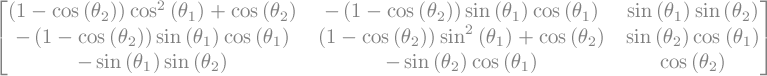

In [14]:
bCa = rotMat(3, th1)
n2 = bCa * Matrix([1, 0, 0])
cCb = rodriguesEq(n2, th2)
cCb

This looks fairly horrible, but is very straightforward to crunch out (especially if you let the computer do all the algebra).  Let's verify that everything is still self-consistent and that $\bhat{n}_2 \equiv \bhat{a}_1$ has the same components in both frame $\mc B$ and $\mc C$:

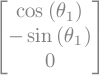

In [15]:
simplify(cCb * n2)

Amazing. Ok, now time for the really mind-blowing part.  Let's work out $\framerot{C}{A} = \framerot{C}{B}\framerot{B}{A}$:

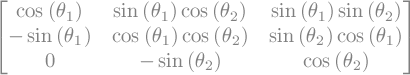

In [16]:
cCa = simplify(cCb * bCa)
cCa

Well, that's unexpectedly...simple.  It also looks a whole lot like a product of two basis-vector DCMs.  It looks that way, because it is. It is exactly equivalent to $C_3^T(-\theta_1)C_1^T(-\theta_2)$.  Look:

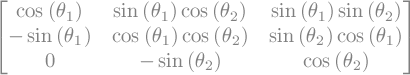

In [17]:
rotMat(3, -th1).transpose() * rotMat(1, -th2).transpose()

Remember: the DCM of a negative rotation is equivalent to the transpose of the DCM of the positive rotation, so what we're really saying is that:
$$ \framerot{C}{A} \equiv C_3(\theta_1) C_1(\theta_2)$$

In space rotations, DCMs are composed by *right* multiplication!  That's it, that's literally the only difference between computing body and space (intrinsic vs extrinsic) rotations!

<div class="alert alert-block alert-warning">
<b>Exercise</b><br> Demonstrate that, for the 3-1 space rotation explored above, a subsequent rotation by $\theta_3$ about $\bhat{a}_2$ generates a DCM equivalent to right-multiplying $\framerot{C}{A}$ by $C_2(\theta_3)$.
</div>

In [18]:
# room to explore

## General Algorithm for Extracting Euler Angles from DCMs

We can write a general algorithm for extracting the angles associated with all 24 (12 space, 12 body) Euler angle sets from any given DCM.  First, let's summarize our findings for space and body DCMs:
<div class="alert alert-block alert-info">
Given Euler angles $\theta_1, \theta_2, \theta_3$ and a set of rotation axes $i,j,k$ such that $i \ne j$ and $j \ne k$:
    $$\framerot{B}{A}_\textrm{Body} = C_k(\theta_3)C_j(\theta_2)C_i(\theta_1)$$
    $$\framerot{B}{A}_\textrm{Space} = C_i(\theta_1)C_j(\theta_2)C_k(\theta_3)$$
</div>

From the form of these matrices we can see that the first and third rotation DCMs ($C_i$ and $C_k$) determine the elements of the final DCM that will be simple products or linear combinations.  For Body rotations, all of the `simple' terms will be in the $k$th row and $i$th column and for Space rotations they will all be in the $i$th row and $k$th column.  The only non-product term in the matrix will be element $(k,i)$ for body rotations and $(i,k)$ for space rotations.  For DCMs employing all 3 axes (e.g. $i \ne j\ne k$) this term will have magnitude $\sin(\theta_2)$, for DCMs with repeated rotations it will have magnitude $\cos(\theta_2)$.  The remaining four terms on these rows and columns will all be products of sines and cosines of the other two angles with $\cos(\theta_2)$ for 3 distinct rotation axes and $\sin(\theta_2)$ for Euler angle sets with repeated axes. 

Let's verify all of these assertions:

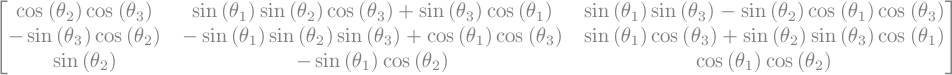

In [19]:
# 3 different rotation axes:
i,j,k  = 1, 2, 3
bCa_body_123 = rotMat(k,th3)*rotMat(j,th2)*rotMat(i,th1)
bCa_body_123

In [20]:
# the (k,i) element should have magnitude sin(\theta_2)
bCa_body_123[k-1, i-1]

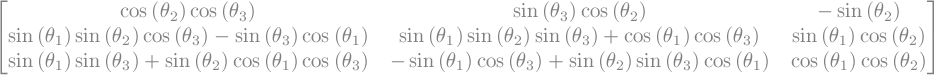

In [21]:
# same rotation set, but now the space rotation:
bCa_space_123 = rotMat(i,th1)*rotMat(j,th2)*rotMat(k,th3)
bCa_space_123

In [22]:
# the (i,k) element should have magnitude sin(\theta_2)
bCa_space_123[i-1, k-1]

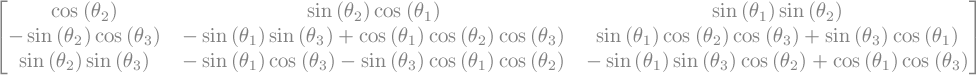

In [23]:
# two unique axes:
i,j,k = 1,3,1
bCa_body_131 = rotMat(k,th3)*rotMat(j,th2)*rotMat(i,th1)
bCa_body_131

In [24]:
# the (k,i) element should have magnitude cos(\theta_2)
bCa_body_131[k-1, i-1]

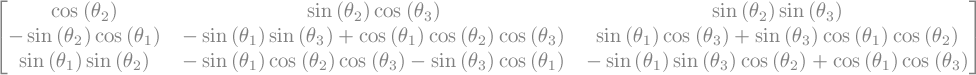

In [25]:
# same rotation set, but now the space rotation:
bCa_space_131 = rotMat(i,th1)*rotMat(j,th2)*rotMat(k,th3)
bCa_space_131

In [26]:
# the (i,k) element should have magnitude cos(\theta_2)
bCa_space_131[i-1, k-1]

Verified! Great! Since the other angle argument in the four remaining terms in the $i,k$ row/column corresponds to the order of rotations, we know that for body rotations the $i$th column will contain the terms with $\theta_3$ and the $k$th row will contain the terms with $\theta_1$.  For Space rotations, this is transposed so that the $i$th row contains the terms with $\theta_3$ and the $k$th column contains the terms with $\theta_1$.

The final observation we need to make is that the signs of the various terms and specific location of cosines and sines will depend on the particular rotation set.  For Body-3/Space-3 rotations, the signs of the DCM terms will always be distributed as in a skew-symmetric matrix (where zeros are treated as positive):
$$J = \begin{bmatrix}
1 & 1 & -1\\ -1 & 1 & 1 \\ 1 & -1 & 1	
\end{bmatrix}$$

This is equivalent to saying that for Body-3 rotations, the single $\sin\theta_2$ term will be positive for even (circular) permutation rotation sets and negative for odd permutation rotation sets (this is reversed for Space-3 rotations).  The terms containing cosines of $\theta_1$ and $\theta_3$ will always be diagonal elements and the terms containing the sines of $\theta_1$ and $\theta_3$ will always be off-diagonal elements.  We can thus tabulate the locations of the elements of interest for Body-3 rotations as follows:
$$\begin{array}{cc} 
\sin{\left(\theta_{2} \right)} & (k,i)\\
\cos{\left(\theta_{3} \right)} \cos{\left(\theta_{2} \right)} & (i,i)\\
\sin{\left(\theta_{3} \right)} \cos{\left(\theta_{2} \right)} & (j,i)\\
\cos{\left(\theta_{1} \right)} \cos{\left(\theta_{2} \right)} & (k,k)\\
\sin{\left(\theta_{1} \right)} \cos{\left(\theta_{2} \right)} & (k,j)\end{array}
$$
with the order of indices reversed for the Space-3 case (this is equivalent to using the same elements from the transpose of the DCM). Note that these terms are sufficient to uniquely identify all three of the angles across all four quadrants.

Let's check to make sure this works on our previously defined Body-3/Space-3 DCMs:

In [27]:
i,j,k  = 1, 2, 3
J = Matrix([[1, 1, -1], [-1, 1, 1], [1, -1, 1]])
tmp = J.multiply_elementwise(bCa_body_123)
tmp[k-1, i-1], tmp[i-1, i-1], tmp[j-1,i-1], tmp[k-1,k-1], tmp[k-1,j-1]

Note that we have multiplied our DCM elementwise by the $J$ matrix in order to ensure that all extracted terms are positive. Elementwise matrix multiplication is also known as taking the Hadamard product or the Schur product, named after French mathematician Jacques Hadamard, who attempted to probe the psychology of mathematical insight, and Russian-born mathematician Issai Schur, who had the unenviable distinction of being the last Jewish faculty member fired from the University of Berlin in 1935.

For Body-2/Space-2 rotations, the isolated $\cos(\theta_2)$ term will always be will always be positive, and of the remaining four terms of interest, the only negative will be element (3,2) when $j = 1$, element (1,3) when $j = 2$, and element (2,1) when $j = 3$. The ordering of the cosines and sines of $\theta_1$ and $\theta_3$ will circularly permute such that for Body-2 rotations:
$$\begin{array}{cc}
\cos{\left(\theta_{2} \right)} & (i,i)\\
\sin{\left(\theta_{2} \right)} \cos{\left(\theta_{3} \right)} & (p,i)\\
\sin{\left(\theta_{2} \right)} \sin{\left(\theta_{3} \right)} & (j,i)\\
\sin{\left(\theta_{2} \right)} \cos{\left(\theta_{1} \right)} & (i,p)\\
\sin{\left(\theta_{1} \right)} \sin{\left(\theta_{2} \right)} & (i,j)\\
\end{array}
$$
where $p$ is the element missing from the rotation set (e.g., $p = 3$ for a 1-2-1 rotation).  This term can be found by $p = 6 - (i+j)$.  Again, the indices are reversed for Space-2 rotations. Let's pause to verify all of this. 

In [28]:
i,j,k  = 1, 3, 1
tmp = bCa_body_131.copy()
tmp[2-1, 1-1] = -tmp[2-1, 1-1] # flipping this negative sign as j = 3 
p = 6 - (i+j)
tmp[i-1, i-1], tmp[p-1, i-1], tmp[j-1,i-1], tmp[i-1,p-1], tmp[i-1,j-1]

We are now ready to package all of these observations up into a single unified algorithm:


In [29]:
def DCM2EulerAngSet(DCM, rotSet, body=True):
    # figure out whether this is a 2- or 3- rotation set
    n = len(np.unique(rotSet))
    assert n in [2, 3], "Rotation set must contain either 2 or 3 distinct elements."
    # extract elements of the Euler angle set for easier use in indexing
    i, j, k = np.asarray(rotSet) - 1

    if n == 3:
        # 3-axis rotation
        # first apply the negatives
        A = Matrix([[1, 1, -1], [-1, 1, 1], [1, -1, 1]]).multiply_elementwise(DCM)

        # if this is a space rotation, transpose the matrix
        if not body:
            A = A.T

        # extract the angles
        sinth2 = A[k, i]  # sin(\theta_2)
        costh2 = sqrt(A[i, i] ** 2 + A[j, i] ** 2)  # cos(\theta_2)
        th2 = atan2(sinth2, costh2)
        th1 = atan2(A[k, j] / costh2, A[k, k] / costh2)
        th3 = atan2(A[j, i] / costh2, A[i, i] / costh2)
    else:
        # 2-axis rotation
        # first take care of the negative
        A = DCM
        negval = {1: (2, 1), 2: (0, 2), 3: (1, 0)}
        A[negval[rotSet[1]]] *= -1

        # if this is a space rotation, transpose the matrix
        if not body:
            A = A.T

        # compute element missing from rotation set
        p = 5 - (rotSet[0] + rotSet[1])

        costh2 = A[i, i]  # cos(\theta_2)
        sinth2 = sqrt(A[p, i] ** 2 + A[j, i] ** 2)  # sin(\theta_2)
        th2 = atan2(sinth2, costh2)
        th1 = atan2(A[i, j] / sinth2, A[i, p] / sinth2)
        th3 = atan2(A[j, i] / sinth2, A[p, i] / sinth2)

    return [th1, th2, th3]

Let's apply this algorithm to the matrices we previously defined:

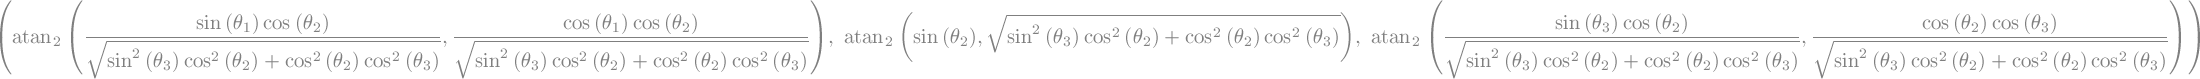

In [30]:
th1c, th2c, th3c =  DCM2EulerAngSet(bCa_body_123, [1, 2, 3])
th1c, th2c, th3c

Once again, sympy will be intransigent about simplifying trigonometric functions:

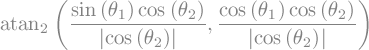

In [31]:
simplify(th1c)

See?  However, we can see that this does properly map to out original $\theta_1$.  We can verify the same for the other two angles.  See if you can convince yourself that this algorithm works for all of various Euler angle sets.

<div class="alert alert-block alert-warning">
<b>Exercise</b><br> Do what it says, above.
</div>

In [32]:
# scratch space

In [33]:
# This is just here to generate the link to the next notebook
genNextLink()

# [Next](<06-Vector Derivatives.ipynb>)